In [1]:
import sys
import os
import pandas as pd
import numpy as np
from importlib import reload

# plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from sklearn.preprocessing import MinMaxScaler

# local import
sys.path.append("../")
from utils.trackmate import dataEngineering as _tm
from utils.visualization import generalPlots as _plot
from utils.trackmate import spatialAnalysis as _stat

/home/cstansbu/.local/lib/python3.8/site-packages/libpysal/weights/util.py:23: UserWarning: geopandas not available. Some functionality will be disabled.
  warn("geopandas not available. Some functionality will be disabled.")


In [2]:
"""Load Data
"""
dir_path = "/nfs/turbo/umms-indikar/shared/projects/live_cell_imaging/WH03/outputs/D3/"

data = _tm.load_trackmate_dir(dir_path)
df = _tm.merge_tracks_and_all(data)
df = _tm.clean_up_trackSpots(df)
print(df.shape)

df.head()

(53356, 66)


,Label_x,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,LINEARITY_OF_FORWARD_PROGRESSION,TOTAL_ABSOLUTE_ANGLE_XY,TOTAL_ABSOLUTE_ANGLE_YZ,TOTAL_ABSOLUTE_ANGLE_ZX,STEP,NORMED_STEP,MEAN_INTENSITY01_SCALED,MEAN_INTENSITY02_SCALED,MEAN_INTENSITY03_SCALED,MEAN_INTENSITY_SCALED
269,ID16890,16890,0,151.274,439.258,484.240,0,0,0,3.5,...,0.159,-1.957,3.142,-1.571,0,0.000000,0.950449,0.243678,1.000000,1.000000
2665,ID16241,16241,0,127.354,438.797,484.634,0,1800,1,3.5,...,0.159,-1.957,3.142,-1.571,1,0.000015,0.654988,0.961750,0.816133,0.816133
3705,ID5538,5538,0,93.415,438.783,484.887,0,3600,2,3.5,...,0.159,-1.957,3.142,-1.571,2,0.000030,0.490973,0.249359,0.514446,0.514446
4769,ID15213,15213,0,61.661,437.684,482.406,0,5400,3,3.5,...,0.159,-1.957,3.142,-1.571,3,0.000045,0.178950,0.106734,0.192985,0.192985
6861,ID16285,16285,0,74.968,437.216,469.729,0,7200,4,3.5,...,0.159,-1.957,3.142,-1.571,4,0.000060,0.982296,0.650069,0.208886,0.208886


In [3]:
# list(df.columns)

Text(0.5, 1.0, 'Cell Cycle Reporters During Wound Healing')

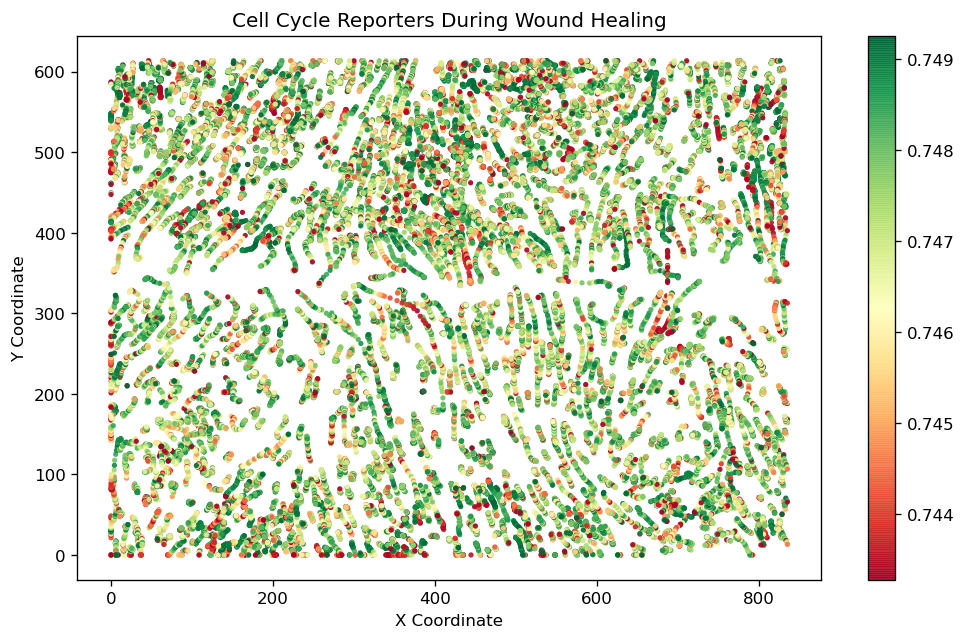

In [4]:
matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams['figure.figsize'] = (15, 12)

df['GREEN_PROP'] = df['MEAN_INTENSITY01'] / (df['MEAN_INTENSITY01'] + df['MEAN_INTENSITY02'])


matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.dpi'] = 120

plt.clf()

for track in df['TRACK_ID'].unique():
    
    tmp = df[df['TRACK_ID'] == track]
    
#     plt.plot(tmp['POSITION_X'], 
#              tmp['POSITION_Y'], 
#              lw=1,
#              alpha=0.5,
#              c='k')
    
    sc = plt.scatter(tmp['POSITION_X'], 
                     tmp['POSITION_Y'], 
                     c=tmp['GREEN_PROP'], 
                     s=10,
                     edgecolor='none', 
                     cmap='RdYlGn',
                     alpha=0.9)
plt.colorbar(sc)
plt.ylabel("Y Coordinate")
plt.xlabel("X Coordinate")
plt.title("Cell Cycle Reporters During Wound Healing")

ValueError: 'x' can have at maximum 2 dimensions

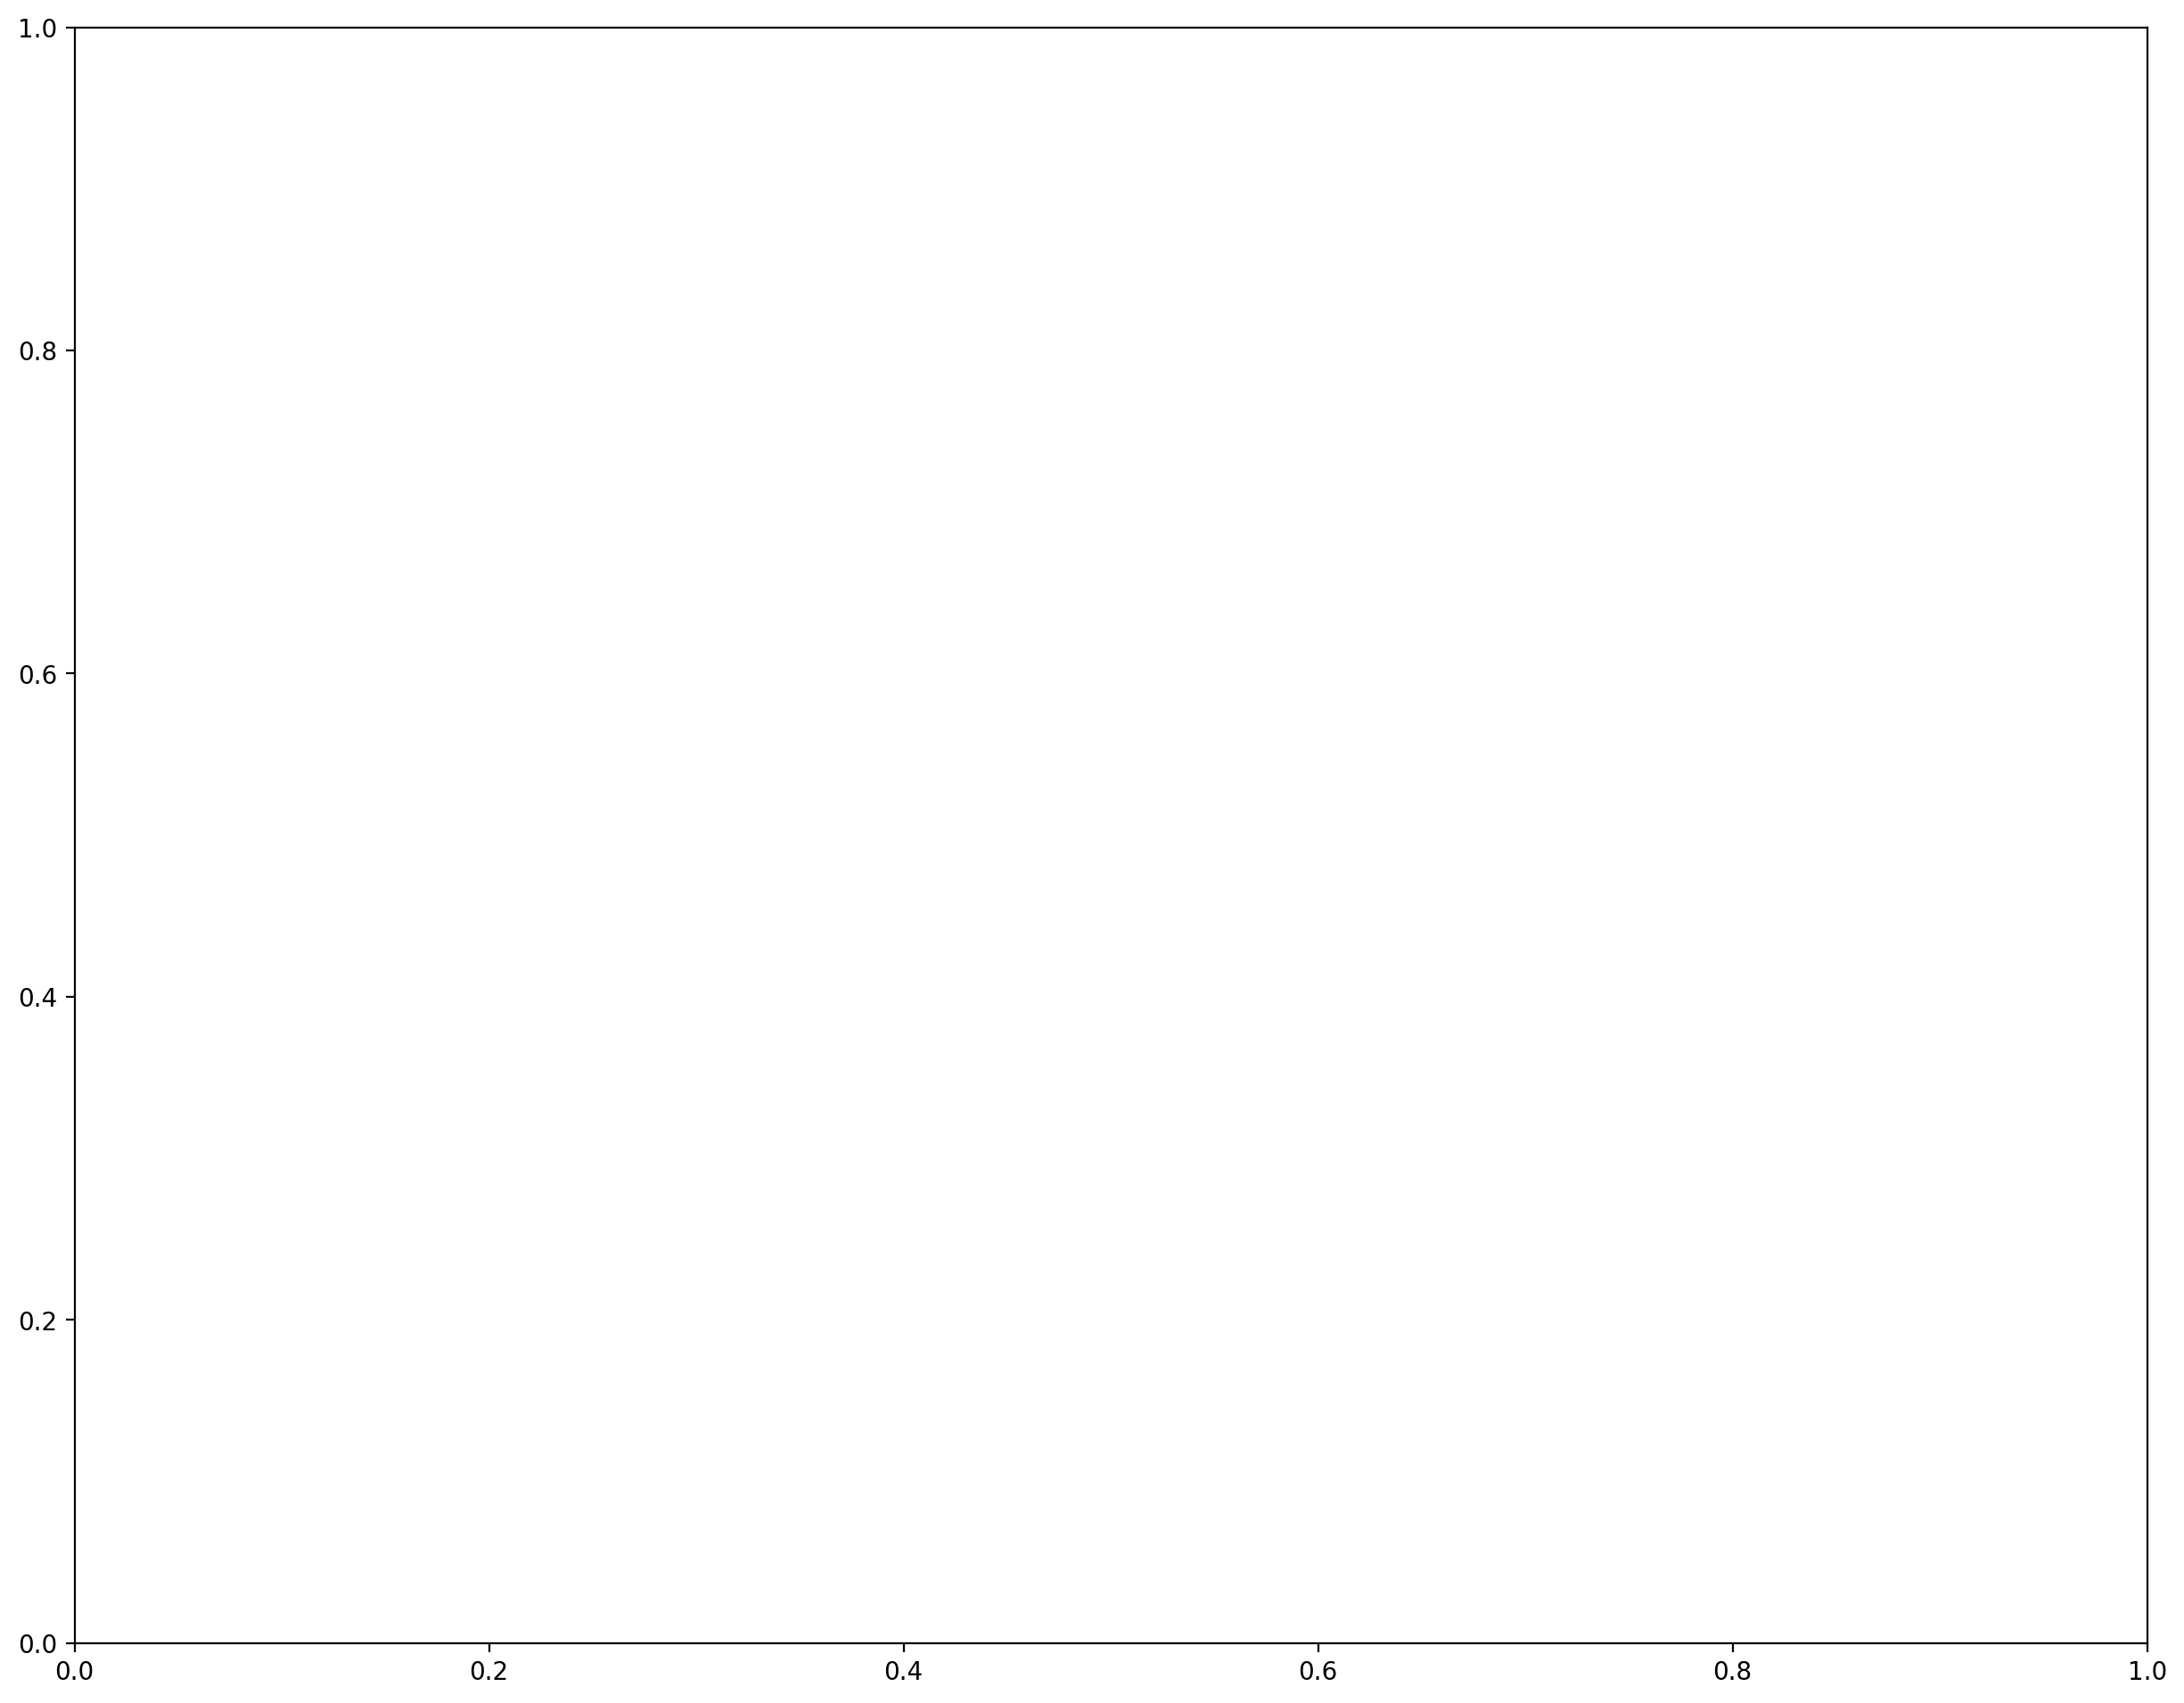

In [6]:
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['figure.figsize'] = (15, 12)

colors = df.groupby('TRACK_ID', as_index=False)['TOTAL_DISTANCE_TRAVELED'].first()

colors['TOTAL_DISTANCE_TRAVELED'] /= colors['TOTAL_DISTANCE_TRAVELED'].max()


colors =  dict(zip(colors['TRACK_ID'], colors['TOTAL_DISTANCE_TRAVELED']))

colormap = cm.plasma

for track in df['TRACK_ID'].unique():
    
    tmp = df[df['TRACK_ID'] == track]
    x = tmp['POSITION_X'].to_numpy()
    y = tmp['POSITION_Y'].to_numpy()
    
    plt.streamplot(x[0], 
                   y[0], 
                   x[-1]-x[0], 
                   y[-1]-y[0])

#     plt.quiver(x[0], 
#                y[0], 
#                x[-1]-x[0], 
#                y[-1]-y[0], 
#                scale_units='xy', 
#                color=colormap(colors[track]),
#                angles='xy', 
#                scale=0.9)

